In [129]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Homework 1:  Introduction

## Question 1

Write out the solution (by-hand) to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = b$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

---
Let $x = \begin{bmatrix}
            x_1\\
            x_2
          \end{bmatrix} $
. Then we can solve for $Ax=b$ by putting the augmented matrix $[A b]$ into reduced row echelon form: 

$$
    A = \begin{bmatrix}
        2 & 1 & 1\\
        1 & 3 & -2
    \end{bmatrix}
    \sim \begin{bmatrix}
        2 & 1 & 1\\
        2 & 6 & -4
    \end{bmatrix}
    \sim \begin{bmatrix}
        2 & 1 & 1\\
        0 & 5 & -5
    \end{bmatrix}
    \sim \begin{bmatrix}
        2 & 1 & 1\\
        0 & 1 & -1
    \end{bmatrix}
$$

Therefore $x = \begin{bmatrix}
            1\\
            -1
          \end{bmatrix}$.}
          
---

**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

---

We can write the system of equations above as an augmented coefficient matrix:

$$
    \begin{bmatrix}
        2 & 3 & 1\\
        6 & 9 & 3
    \end{bmatrix}
    \sim \begin{bmatrix}
        1 & 3/2 & 1/2\\
        0 & 0 & 0
    \end{bmatrix}
$$

Let $x = \begin{bmatrix}
            x_1\\
            x_2
         \end{bmatrix}$. 
         
The pivot point is in column 1. In other words, $x_2$ is a free variable, so finally, the solution becomes 
$$
    x_1 = \frac{1}{2} - \frac{3}{2}x_2\\ 
    or\\
    x_1 + \frac{3}{2}x_2 = \frac{1}{2} 
$$

---

**(c)** (5) Why will I not be able to solve $Ax=b$ for
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$
Describe why this is a problem in terms of the column, row, left-null, and null spaces of $A$ and how that relates to the vector $b$.

---
$Ax=b$ has no solution because matrix $b$ is not in matrix $A$'s column or row space. 

Furthermore, since the null space of $A$ has the basis $ = \begin{bmatrix}
            0\\
            0
         \end{bmatrix}$, matrix $b$ cannot be a solution, since the only solution is trivial ($x_1=x_2=0$). 
         
In addition, the reduced echelon form for the augmented matrix is = 
$\begin{pmatrix}
    1 & 0 & \frac{6}{5} \\
    0 & 1 & \frac{-2}{5} \\
    0 & 0 & 1
\end{pmatrix}$
which has no solution, since $0 \neq 1$.

---

## Question 2

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance).

In [262]:
def compute_sum(a, b, tolerance=1e-5):
    """Compute the sum $\sum^\infty_{n=1} a^n / b^{n-1} until the partial sums are less than *tolerance*.
    
    Returns the computed sum and raises a *ValueError* if the sum appears to be diverging.
    """   
    n = 1
    sum1 = prevsum = 0
    diff = tolerance
    
    while abs(diff) >= tolerance:
        if abs(a) > abs(b):
            raise ValueError("divergent series")
        prevsum = sum1
        sum1 += (a**n) / (b**(n-1))
        diff = sum1 - prevsum
        n+=1
    
    #print(sum1)    
    return sum1

In [263]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the value of the tolerance
$$
    \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
versus the difference.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.  Use the functions `logspace` to generate well spaced points and `loglog` to plot the data.

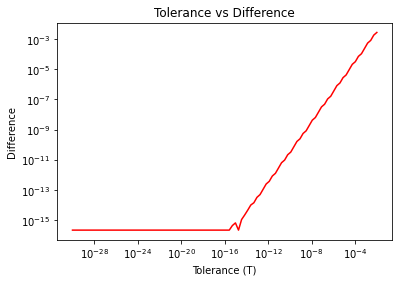

In [266]:
t = numpy.logspace(-30, -2, 100)
d = []
for i in t: 
    tolerance = numpy.abs(compute_sum(-2, 3, tolerance=i) - (-1.2))
    d.append(tolerance)
    
plt.loglog(t, d, 'r')
plt.xlabel("Tolerance (T)")
plt.ylabel("Difference")
plt.title("Tolerance vs Difference")
plt.show()

We can observe that the for $T \in [10^{-30}, 10^{-16}]$, we have a constant difference, which has an approximately linear blah blah


## Question 3

**(a)** (7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$.

---
($f(x) = e^{-x^2}sin(x-\pi)$ with $x_o = \pi$)

Since $sin(x-\pi) = -sinx$, we can write the equation as $f(x) = -e^{-x^2}sinx$. 

Taylor series is given by: $f(x) = f(x_o) + f'(x_o)(x-x_o) + f''(x_o)\frac{(x-x_o)^2}{2} + (...)$. We can solve for each term:

1st term: $f(x_o)$
\begin{equation} 
\begin{split}
    f(x_o = \pi) = -e^{-\pi^2}sin(\pi) = 0
\end{split}
\end{equation}

2nd term: $f'(x_o)(x-x_o)$
\begin{equation} 
\begin{split}
    f'(x) & = 2xe^{-x^2}sinx-e^{-x^2}cosx\\
    f'(x_o = \pi) & = 2\pi e^{-\pi^2}sin(\pi)-e^{-\pi^2}cos(\pi)\\
    & = e^{-\pi^2}
\end{split}
\end{equation}
so the second term is = $e^{-\pi^2}(x-\pi)$

3rd term: $f''(x_o)\frac{(x-x_o)^2}{2}$
\begin{equation} 
\begin{split}
    f''(x) & = 2\left(-2 x^2 e^{-x^2} sinx + e^{-x^2}sinx + xe^{-x^2} cosx\right) + e^{-x^2}sinx + 2xe^{-x^2}cosx\\
    & = -4x^2 e^{-x^2} sinx + 3e^{-x^2}sinx + 4xe^{-x^2} cosx\\
    f''(x_o = \pi & ) = -4\pi e^{-\pi ^ 2}
\end{split}
\end{equation}
so the third term is = $-4\pi e^{-\pi ^ 2} \frac{(x-\pi)^2}{2} = -2\pi e^{-\pi^2}(x-\pi)^2$

Finally, the Taylor series becomes:
$$
    f(x) = 0 + e^{-\pi^2}(x-\pi) - 2\pi e^{-\pi^2}(x-\pi)^2 + (...)
$$

---

**(b)** (8) Solve the ODE
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Plot the solution and comment on its behavior as $t \rightarrow \infty$.

---

Characteristic equation: 
$$
    \chi(\lambda) = \lambda^2 + \lambda + \frac{5}{4} = 0\\
    \lambda_{1,2} = -0.5 \pm i
$$

So the general solution is $u(t) = e^{-t/2}(c_1cos(t) + c_2sin(t))$

Using the initial condition $u(0) = 3$, 

\begin{equation} 
\begin{split}
    u(0) & = e^{0}c_1 = 3\\
    c_1 & = 3 
\end{split}
\end{equation}

Similarly, using IC $u'(0) = 1$, 
\begin{equation} 
\begin{split}
    u'(t) & = e^{-t/2}(-3 \sin t + c_{2} \cos t) + (-\frac{1}{2}) e^{-t/2} ( 3 \cos t + c_{2} \sin t )\\
    u'(0) & = c_2 - \frac{1}{2}(3) = 1\\
    c_2 & = \frac{5}{2}
\end{split}
\end{equation}

So finally, $u(t) = e^{-t/2}(3cos(t) + \frac{5}{2}sin(t))$. 

As t $\rightarrow \infty $, $x \rightarrow 0$ 

---

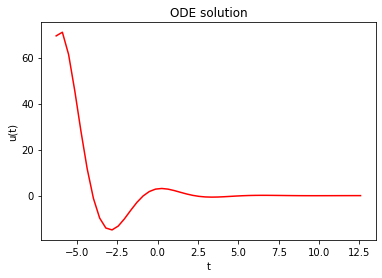

In [210]:
x = numpy.linspace(-2*numpy.pi, 4*numpy.pi)
y = numpy.e ** (-x / 2) * ( 3 * numpy.cos(x) + 5/2 * numpy.sin(x))
plt.plot(x, y, 'r')
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("ODE solution")
plt.show()

## Question 4

(5) Plot something "fun" making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

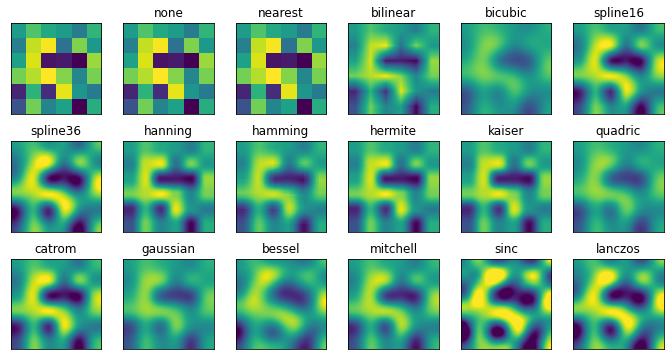

In [211]:
import matplotlib.pyplot as plt
import numpy as numpy

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

numpy.random.seed(0)
grid = numpy.random.rand(6, 6)

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(interp_method)

plt.show()


## Question 5 - The Trouble with Tribbles

Plot the following data using the appropriate plot types making sure to adding lables, units, and titles.  Also refer to the [matplotlib gallery](http://matplotlib.org/gallery.html) to figure out how to plot some of what is asked.

**(a)** [5] The number of tribbles (furry animals from Star Trek) is modeled by Spock to be exponential.  Spock predicts that in a 3 day period that the tribbles will go from an initial population number of $N_0 = 1$ to $N(3) = 1,771,561$ tribbles.  The assumptions that Spock made are the following:
 - The tribbles reproduce every 12 hours.
 - Tribbles reproduce asexually so that 1 tribble will produce 10 more tribbles leading to a total of 11 tribbles.
Write a function that confirms Spock's estimate and plot the function.

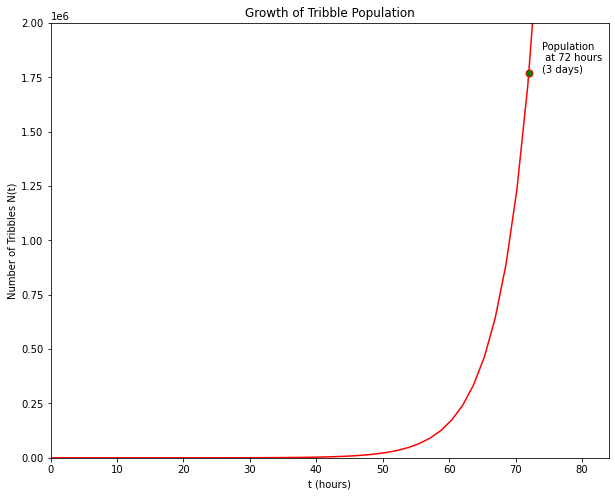

In [220]:
plt.figure(figsize=(10,8))
x = numpy.linspace(0, 80, endpoint=True)
y = numpy.e ** (0.1998 * x)
plt.plot(x, y, 'r')
plt.xlabel("t (hours)")
plt.ylabel("Number of Tribbles N(t)")
plt.title("Growth of Tribble Population")
plt.xlim([0, 84])
plt.ylim([0, 2000000])
p1 = 72
p2 = 1771561
plt.plot(p1, p2, marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.annotate("Population\n at 72 hours \n(3 days)", (p1+2, p2))
plt.show()

**(b)** [5] Assuming that tribbles cannot stack themselves on top of each other perfectly we also would like to model and plot the spread of tribbles throughout our space ship.  Assume our space ship is a square use the following function to plot the population on our space ship of tribbles:
$$
    N(x, y) = N_0 e^{-r^2/\sigma^2}
$$
where $N_0 = 1000$, $\sigma = 0.1$ and $r$ is the distance from the middle of our space ship.

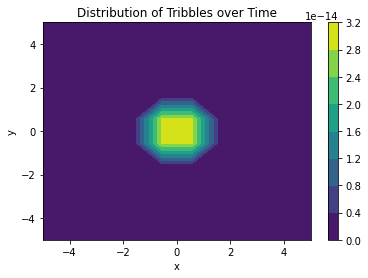

In [247]:
xlist = np.linspace(-5, 5, 10)
ylist = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(xlist, ylist)

rsqr = X**2 + Y**2
N = 1000 * numpy.exp(-(rsqr**2) / (0.1**2))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, N)

fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Distribution of Tribbles over Time')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()